## Characterization of an indoor environment

The VLC-RM Python package was created to estimate the DC gain, the interchannel interference, and the lighting parameters of a CSK system in rectangular empty rooms. To use this package, four modules must be imported.

In [8]:
# Import Transmitter
from vlc_rm.transmitter import Transmitter
# Import Photodetector
from vlc_rm.photodetector import Photodetector
# Import Indoor Environment
from vlc_rm.indoorenv import Indoorenv
# Import REcursiveModel
from vlc_rm.recursivemodel import Recursivemodel
# Import Symbol Constants
from vlc_rm.constants import Constants as Kt
# Import numpy
import numpy as np

### Transmitter:
The transmitter of a system is defined from a set of parameters as follows:

In [9]:
transmitter = Transmitter(
            "Led1",
            position=[2.5, 2.5, 3],
            normal=[0, 0, -1],
            mlambert=1,
            wavelengths=[620, 530, 475],
            fwhm=[20, 45, 20],
            modulation='ieee16',
            luminous_flux=5000
                    )
print(transmitter)


 List of parameters for LED transmitter: 
Name: Led1
Position [x y z]: [2.5000e+00 2.5000e+00 3.0000e+00] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 -1.0000e+00]] 
Lambert Number: 1.0 
Central Wavelengths [nm]: [6.2000e+02 5.3000e+02 4.7500e+02] 
FWHM [nm]: [2.0000e+01 4.5000e+01 2.0000e+01]
Luminous Flux [lm]: 5000.0
ILER [W/lm]: 
 [[3.8001e-03 0.0000e+00 0.0000e+00]
 [0.0000e+00 1.9315e-03 0.0000e+00]
 [0.0000e+00 0.0000e+00 1.1960e-02]] 
Average Power per Channel Color: 
 [6.3336e+00 3.2192e+00 1.9934e+01] 
Total Power emmited by the Transmitter [W]: 
 29.486793736402465 



Once the transmitter is defined, the spectral power distribution and the spatial power distribution can be plotted.

In [ ]:
transmitter.plot_spd_normalized()
transmitter.plot_spd_at_1lm()
transmitter.plot_spatial_distribution()

### Photodetector

The second device is the photodetector. It is defined as:

In [10]:
pd = Photodetector(
    "PD1",
    position=[1.5, 1.5, 0.85],
    normal=[0, 0, 1],
    area=(1e-6)/3,
    # area=0.5e-4,
    fov=85,
    sensor='S10917-35GT',
    idark=1e-12
            )
print(pd)


 List of parameters for photodetector PD1: 
Name: PD1 
Position [x y z]: [1.5000e+00 1.5000e+00 8.5000e-01] 
Normal Vector [x y z]: [[0.0000e+00 0.0000e+00 1.0000e+00]] 
Active Area[m2]: 3.3333333249174757e-07 
FOV: 85.0 
Sensor: S10917-35GT


The sensor parameter is the reference of a commercial Hamamatsu RGB color sensor. According with  the manufacturer this sensor has three photodector with an active area 0.33e-6 [m^2] per detector, a dark current equal to 1-pA. The spectral responsivity of this device can be plotted by the following:

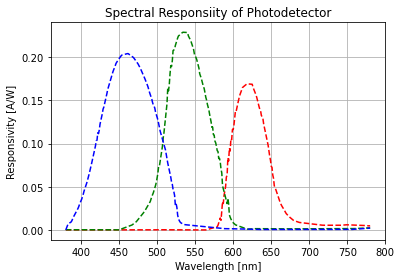

In [11]:
pd.plot_responsivity()

### Indoor Environment

The indoor space for VLC is defined by using the 'IndoorEnv' module. The 'no_reflections' parameter specifies the order of reflection to compute the  lighting parameters and the interchannel interference. With the VLC-RM package, the reflectance of each wall can be defined at the central wavelengths. The 'resolution' parameter determines the length of the small square area. THe method 'create_environment()' are used to create a grid of points and two pairwise parameters of the indoor environment.

In [12]:
room = Indoorenv(
        "Room",
        size=[5, 5, 3],
        no_reflections=10,
        resolution=1/10,
        ceiling=[0.82, 0.71, 0.64],
        west=[0.82, 0.71, 0.64],
        north=[0.82, 0.71, 0.64],
        east=[0.82, 0.71, 0.64],
        south=[0.82, 0.71, 0.64],
        floor=[0.635, 0.61, 0.58]
            )
room.create_environment(transmitter, pd)
print(room)


 Creating parameters of indoor environment ...
Parameters created!


 List of parameters for indoor envirionment Room: 
Name: Room
Size [x y z] -> [m]: [5.0000e+00 5.0000e+00 3.0000e+00] 
Order reflection: 10 
Resolution points [m]: 0.10000000149011612
Smaller Area [m^2]: 0.01
Number of points: 11002



### Simulation of multiple PD positions

The simulation of the indoor WDM-VLC is carried out by the 'RecursiveModel' module, which is defined the following.

In [ ]:
channel_model = Recursivemodel(
        "ChannelModelA",
        transmitter,
        pd,
        room
        )
channel_model.simulate_channel()    
print(channel_model)

To realize a simulation for multiple receiver positions, the 'create_environment()' method is used by setting a mode='modified'. The 'modified' option allows to change the position or the orientation of the transmitter and the detector without recalculating all parameters. A list with the different positions is defined and then the iterative calculation of the channel simulation is deploy.

In [6]:
# Create x, y, z arrays
nx = 5
ny = 5
x = np.linspace(0.5, 4.5, nx)
y = np.linspace(0.5, 4.5, ny)

# Create a 3D meshgrid
X, Y = np.meshgrid(x, y)
Z = 0.85

for i in range(nx):
    for j in range(ny):
        # Define a photodetector position
        pd.position =  [X[i,j], Y[i,j], Z]
        # Compute the paramteres of the indoor enviorment
        room.create_environment(transmitter, pd, mode='modified')
        # Define the model
        channel_model = Recursivemodel(
            "ChannelModelA",
            transmitter,
            pd,
            room
            )
        # Simulate indoor channel
        channel_model.simulate_channel()    
        # Print results of the simulation
        print(channel_model)


[0.5, 0.5, 0.85]
[1.5, 0.5, 0.85]
[2.5, 0.5, 0.85]
[3.5, 0.5, 0.85]
[4.5, 0.5, 0.85]
[0.5, 1.5, 0.85]
[1.5, 1.5, 0.85]
[2.5, 1.5, 0.85]
[3.5, 1.5, 0.85]
[4.5, 1.5, 0.85]
[0.5, 2.5, 0.85]
[1.5, 2.5, 0.85]
[2.5, 2.5, 0.85]
[3.5, 2.5, 0.85]
[4.5, 2.5, 0.85]
[0.5, 3.5, 0.85]
[1.5, 3.5, 0.85]
[2.5, 3.5, 0.85]
[3.5, 3.5, 0.85]
[4.5, 3.5, 0.85]
[0.5, 4.5, 0.85]
[1.5, 4.5, 0.85]
[2.5, 4.5, 0.85]
[3.5, 4.5, 0.85]
[4.5, 4.5, 0.85]
